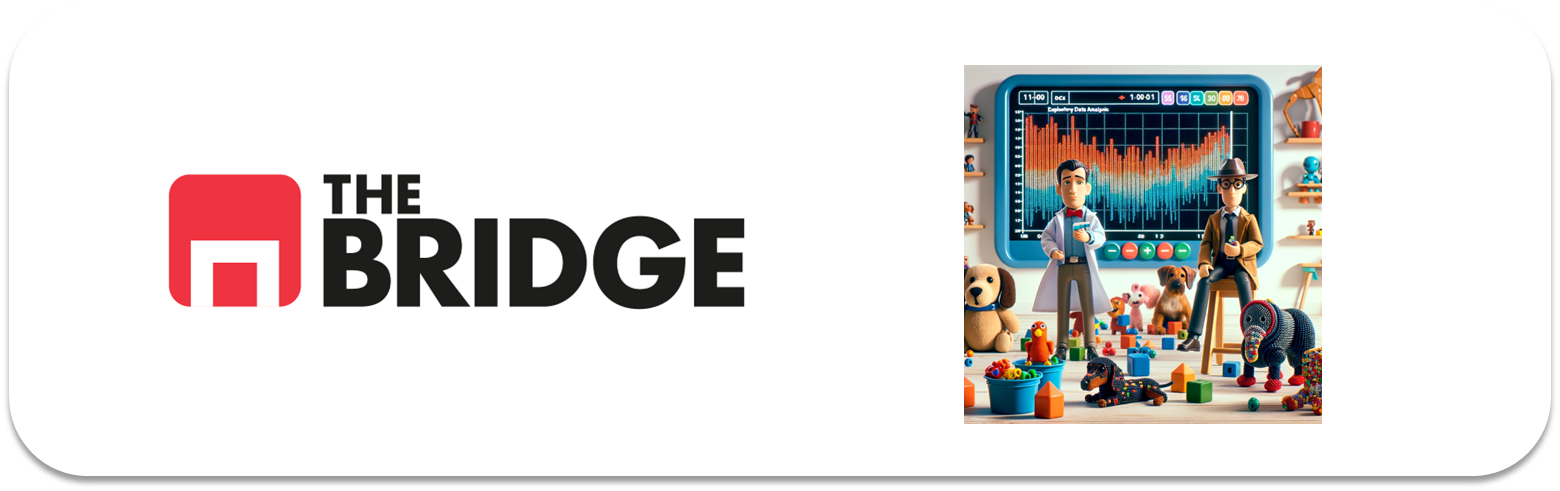

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [49]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df = df_titanic.drop(columns = ["deck", "survived","pclass", "embarked"])
df.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
df["family_members"] = df["parch"] + df["sibsp"]
df.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0


In [5]:
df = df.drop(columns = ["parch","sibsp"])
df.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [6]:
moda_embark_town = df['embark_town'].mode()[0] #ponemos 0 para que si hay mas de un valor en la moda nos devuelva el primero
df['embark_town'] = df['embark_town'].fillna(moda_embark_town)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [7]:
edad_promedio = df.groupby('who')['age'].mean()
edad_promedio

who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64

In [8]:
df['age'] = df.groupby('who')['age'].transform(lambda x: x.fillna(x.mean()))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

### 1.6.1

In [9]:
# En terminos absolutos sobrevivieron más mujeres
df.groupby('who')['alive'].value_counts()

who    alive
child  yes       49
       no        34
man    no       449
       yes       88
woman  yes      205
       no        66
Name: count, dtype: int64

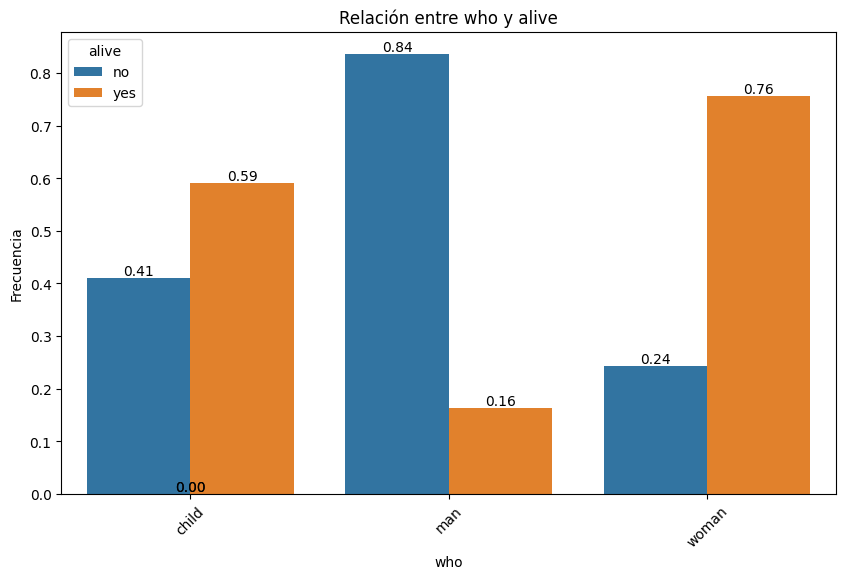

In [10]:
# en términos relativos también sobrevivieron más mujeres
plot_categorical_relationship_fin(df,"who","alive",relative_freq=True,show_values=True)

In [11]:
tabla_contingencia = pd.crosstab(df['who'], df['alive'])

tabla_contingencia

alive,no,yes
who,,
child,34,49
man,449,88
woman,66,205


In [12]:
chi2, p_valor, dof, expected = stats.chi2_contingency(tabla_contingencia)

print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"Valor p: {p_valor}")

Estadístico Chi-cuadrado: 283.923050324233
Valor p: 2.2227620817798914e-62


In [13]:
# Para saber si hay relacion de dos variables categoricas usamos la tabla de contingencia y después usamos la chi2.
# En este caso p nos ha dado un valor muy pequeño por lo tanto hay una relacion significativa entre las dos variables.

In [14]:
# Idem para comparar sexo y edad
tabla_contingencia = pd.crosstab(df['sex'], df['alive'])
chi2, p_valor, dof, expected = stats.chi2_contingency(tabla_contingencia)

print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"Valor p: {p_valor}")

Estadístico Chi-cuadrado: 260.71702016732104
Valor p: 1.1973570627755645e-58


### 1.6.2

In [15]:
# En terminos absolutos sobrevivieron más pasajeros de primera clase
df.groupby('class')['alive'].value_counts()

class   alive
First   yes      136
        no        80
Second  no        97
        yes       87
Third   no       372
        yes      119
Name: count, dtype: int64

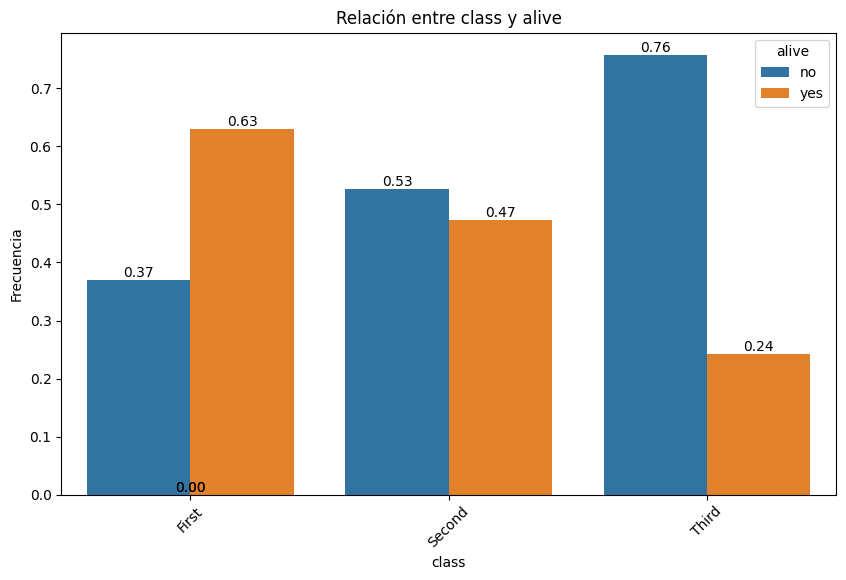

In [16]:
# en términos relativos también sobrevivieron más pasajeros de primera clase
plot_categorical_relationship_fin(df,"class","alive",relative_freq=True,show_values=True)

In [17]:
# En este caso p nos ha dado un valor muy pequeño por lo tanto hay una relacion significativa entre las dos variables.
tabla_contingencia = pd.crosstab(df['class'], df['alive'])
chi2, p_valor, dof, expected = stats.chi2_contingency(tabla_contingencia)

print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"Valor p: {p_valor}")

Estadístico Chi-cuadrado: 102.88898875696056
Valor p: 4.549251711298793e-23


### 1.6.3

In [18]:
# En terminos absolutos sobrevivieron más pasajeros de Shoutampton
df.groupby('embark_town')['alive'].value_counts()

embark_town  alive
Cherbourg    yes       93
             no        75
Queenstown   no        47
             yes       30
Southampton  no       427
             yes      219
Name: count, dtype: int64

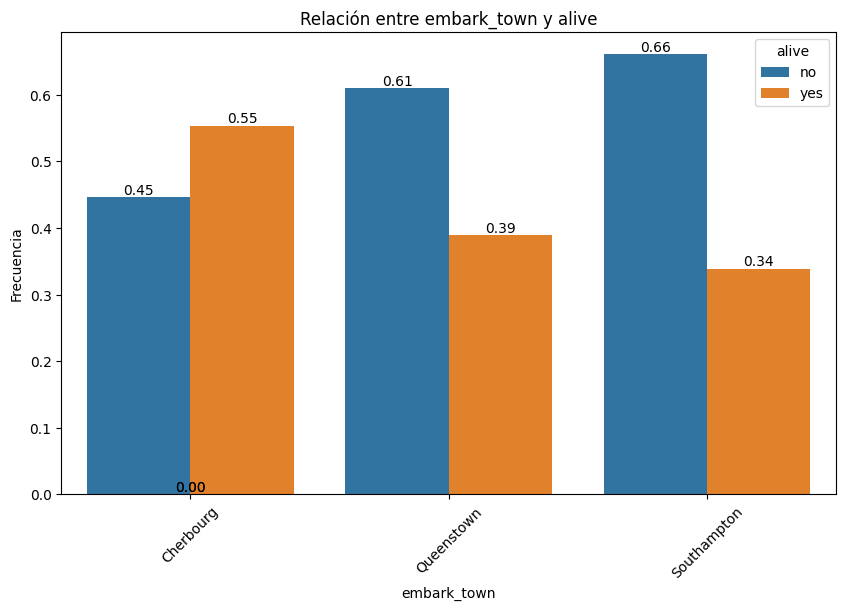

In [19]:
# en términos relativos también sobrevivieron más pasajeros de Cherbourg
plot_categorical_relationship_fin(df,"embark_town","alive",relative_freq=True,show_values=True)

In [20]:
# En este caso p nos ha dado un valor muy pequeño por lo tanto hay una relacion significativa entre las dos variables.
tabla_contingencia = pd.crosstab(df['embark_town'], df['alive'])
chi2, p_valor, dof, expected = stats.chi2_contingency(tabla_contingencia)

print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"Valor p: {p_valor}")

Estadístico Chi-cuadrado: 25.964452881874784
Valor p: 2.3008626481449577e-06


### 1.6.4

In [21]:
# En terminos absolutos sobrevivieron más pasajeros que pagaron 13 libras
supervivientes = df[df['alive'] == 'yes']

# Agrupar por 'fare' y contar cuántos sobrevivieron en cada tarifa. Lo ordenamos para que sea más facil.
supervivientes_por_tarifa = supervivientes.groupby('fare').size().sort_values(ascending=False)

supervivientes_por_tarifa


fare
13.0000     16
26.0000     15
7.7500      12
10.5000      9
7.9250       8
            ..
82.1708      1
81.8583      1
78.8500      1
83.4750      1
247.5208     1
Length: 153, dtype: int64

In [22]:
# Filtrar los datos de los sobrevivientes y no sobrevivientes
sobreviven = df[df['alive'] == 'yes']['fare']
no_sobreviven = df[df['alive'] == 'no']['fare']

# Realizar ANOVA para comparar las medias de 'fare' entre los grupos 'alive'
f_stat, p_value = stats.f_oneway(sobreviven, no_sobreviven)

print(f"Estadístico F: {f_stat}")
print(f"Valor p: {p_value}")

Estadístico F: 63.03076422804448
Valor p: 6.120189341921873e-15


In [23]:
# como el p valor es muy pequeño hay correlacion significativa

### 1.6.5

In [24]:
# Puede que sean pasajeros que se han colado o miembros de la tripulacion
minimo = df['fare'].min()
df[df['fare'] == minimo]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0


In [25]:
# Todos los que pagaron la tarifa maxima sobrevivieron
maximo = df['fare'].max()
df[df['fare'] == maximo]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


### 1.6.6

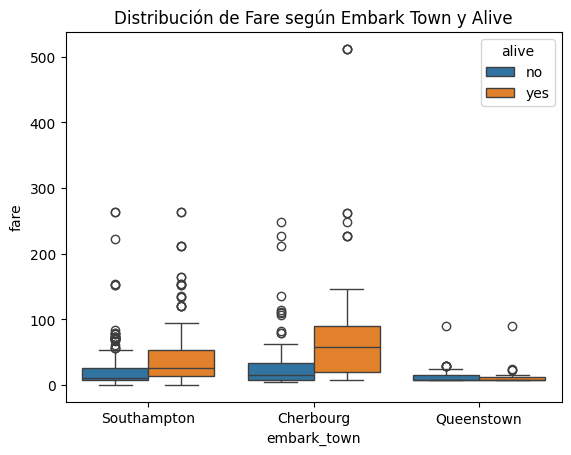

In [26]:
# Usamos un boxplot para ver si hay correlacion entre las tres variables.
sns.boxplot(data=df, x='embark_town', y='fare', hue='alive')
plt.title('Distribución de Fare según Embark Town y Alive')
plt.show()

In [27]:
# Según el grafico observamos que los pasajeros de Cherbourg pagaron tarifas más altas y sobrevivieron más.

### 1.6.7

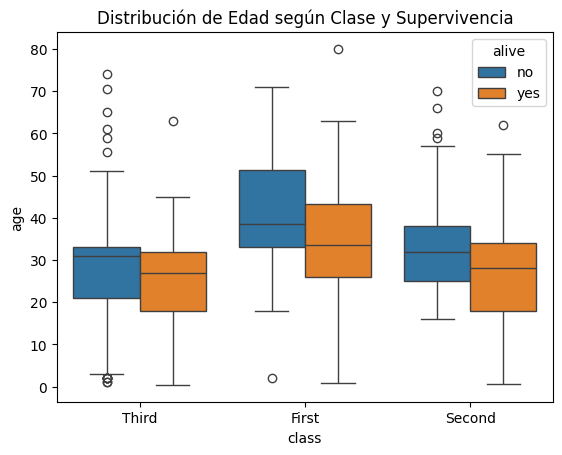

In [28]:
sns.boxplot(data=df, x='class', y='age', hue='alive')
plt.title('Distribución de Edad según Clase y Supervivencia')
plt.show()

In [29]:
# Según el gráfico los que más sobrevivieron fueron personas de primera clase entre 35 y 45 años.

### 1.6.8

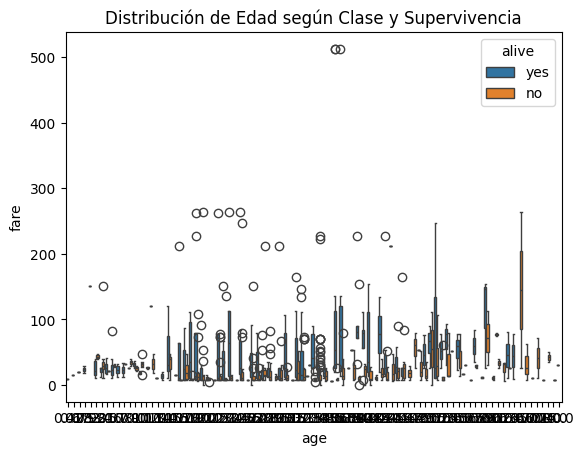

In [30]:
sns.boxplot(data=df, x='age', y='fare', hue='alive')
plt.title('Distribución de Edad según Clase y Supervivencia')
plt.show()

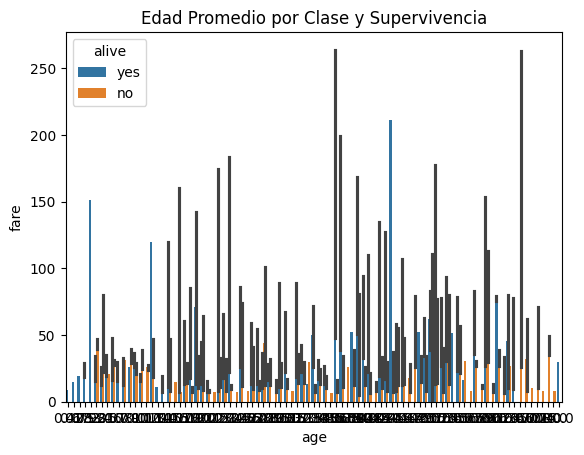

In [31]:
sns.barplot(data=df, x='age', y='fare', hue='alive')
plt.title('Edad Promedio por Clase y Supervivencia')
plt.show()

In [32]:
# Como con graficos no esclarecemos nada al ser tantos datos vamos a crear grupos de tarifas y de edades para realizar el analisis

In [33]:
fare_bins = [0, 10, 20, 50, 100,200,300,400,500, float('inf')]  # Definir los límites de las tarifas
fare_labels = ['0-10', '10-20', '20-50', '50-100', '100-200', '200-300', '300-400','400-500', '500+']  # Etiquetas de los rangos
df['fare_group'] = pd.cut(df['fare'], bins=fare_bins, labels=fare_labels)
df

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,fare_group
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1,0-10
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1,50-100
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0,0-10
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1,50-100
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0,0-10
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0,10-20
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0,20-50
888,female,32.0,23.4500,Third,woman,False,Southampton,no,False,3,20-50
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0,20-50


In [34]:
age_bins = [0, 5, 10, 15, 20,30,40,50,60, float('inf')]  # Definir los límites de las edades
age_labels = ['0-5', '5-10', '10-15', '15-20', '20-30', '30-40', '40-50','50-60', '60+']  # Etiquetas de los rangos
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
df

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,fare_group,age_group
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1,0-10,20-30
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1,50-100,30-40
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0,0-10,20-30
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1,50-100,30-40
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0,0-10,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0,10-20,20-30
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0,20-50,15-20
888,female,32.0,23.4500,Third,woman,False,Southampton,no,False,3,20-50,30-40
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0,20-50,20-30


In [35]:
grupos = df.groupby(['fare_group', 'age_group'])['alive'].value_counts().reset_index(name='count')
grupos

C:\Users\maria\AppData\Local\Temp\ipykernel_3208\881161920.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupos = df.groupby(['fare_group', 'age_group'])['alive'].value_counts().reset_index(name='count')


,fare_group,age_group,alive,count
0,0-10,0-5,yes,1
1,0-10,0-5,no,0
2,0-10,5-10,no,0
3,0-10,5-10,yes,0
4,0-10,10-15,yes,3
...,...,...,...,...
157,500+,40-50,yes,0
158,500+,50-60,no,0
159,500+,50-60,yes,0
160,500+,60+,no,0


In [36]:
grupos['age_group'].value_counts()

age_group
0-5      18
5-10     18
10-15    18
15-20    18
20-30    18
30-40    18
40-50    18
50-60    18
60+      18
Name: count, dtype: int64

In [37]:
maximo = grupos['count'].max()
grupos[grupos['count'] == maximo]

,fare_group,age_group,alive,count
10,0-10,30-40,no,109


In [38]:
# El grupo que menos sobrevivio fue el que tenia entre 30 y 40 y las tarifas entre 0 y 10

In [39]:
alive_yes = grupos[grupos['alive'] == 'yes']
maximo = alive_yes['count'].max()
alive_yes[alive_yes['count'] == maximo]

,fare_group,age_group,alive,count
47,20-50,30-40,yes,30


In [40]:
# El grupo que más sobrevivio fue el que tenia entre 30 y 40 y que pagaron tarifas entre 20 y 50

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [42]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_air_jun.head()

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


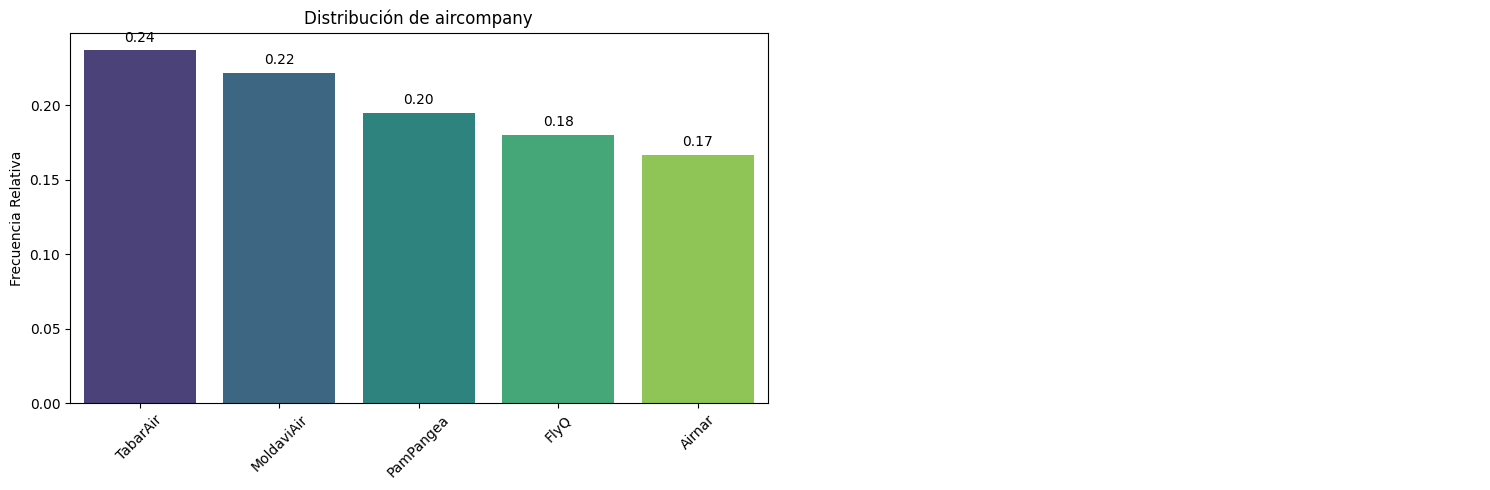

In [43]:
pinta_distribucion_categoricas(df_air_jun,["aircompany"], relativa= True, mostrar_valores= True)

(2,)


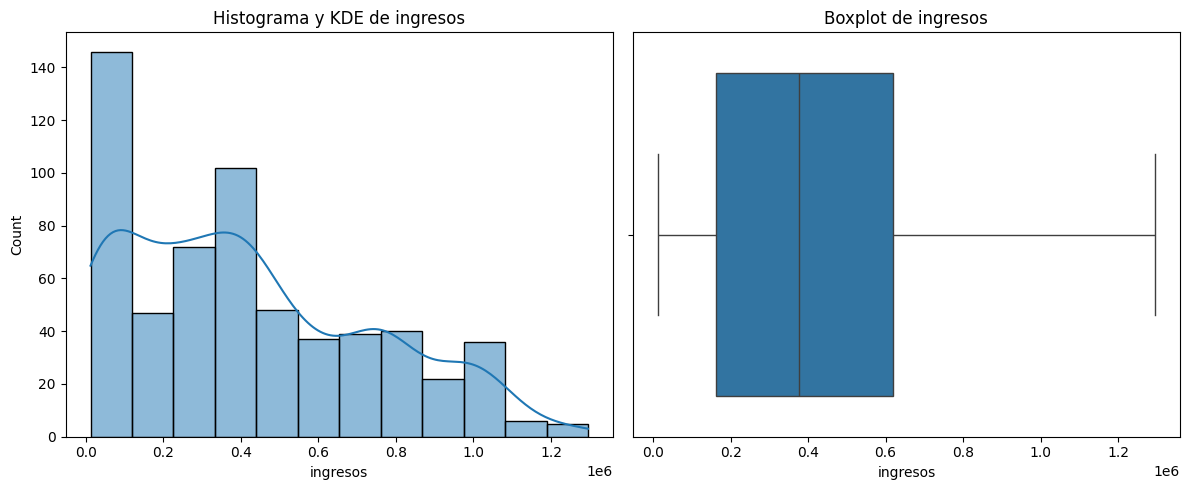

In [44]:
plot_combined_graphs(df_air_jun,["ingresos"])

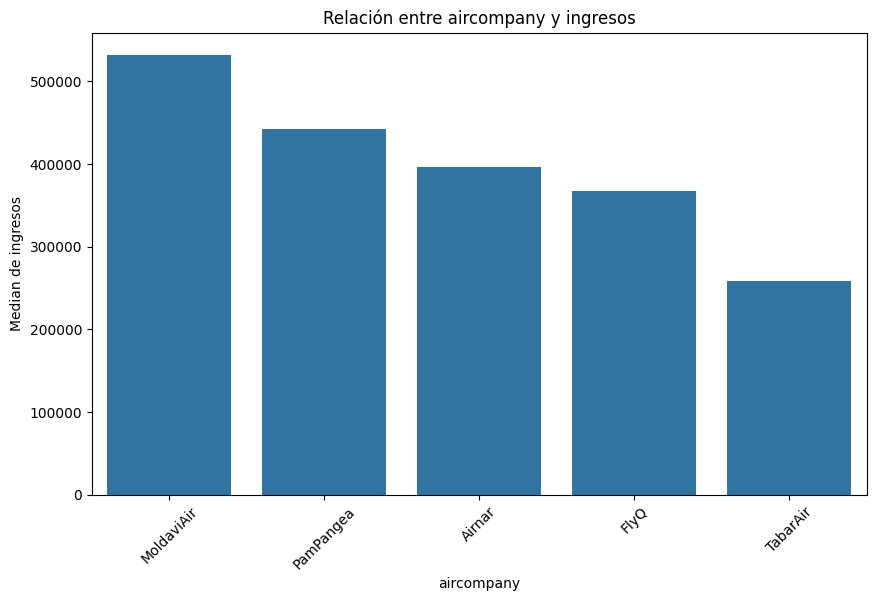

In [45]:
plot_categorical_numerical_relationship(df_air_jun, "aircompany","ingresos",measure="median") # Utilizando mediana

In [46]:
# TabarAir es la que menos vuelos realiza pero es la tercera en ingresos por lo que puede ser la compañia mas eficiente.
# Por otro lado tenemos que TabarAir es la que mas vuelos realiza pero es la de menores ingresos

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


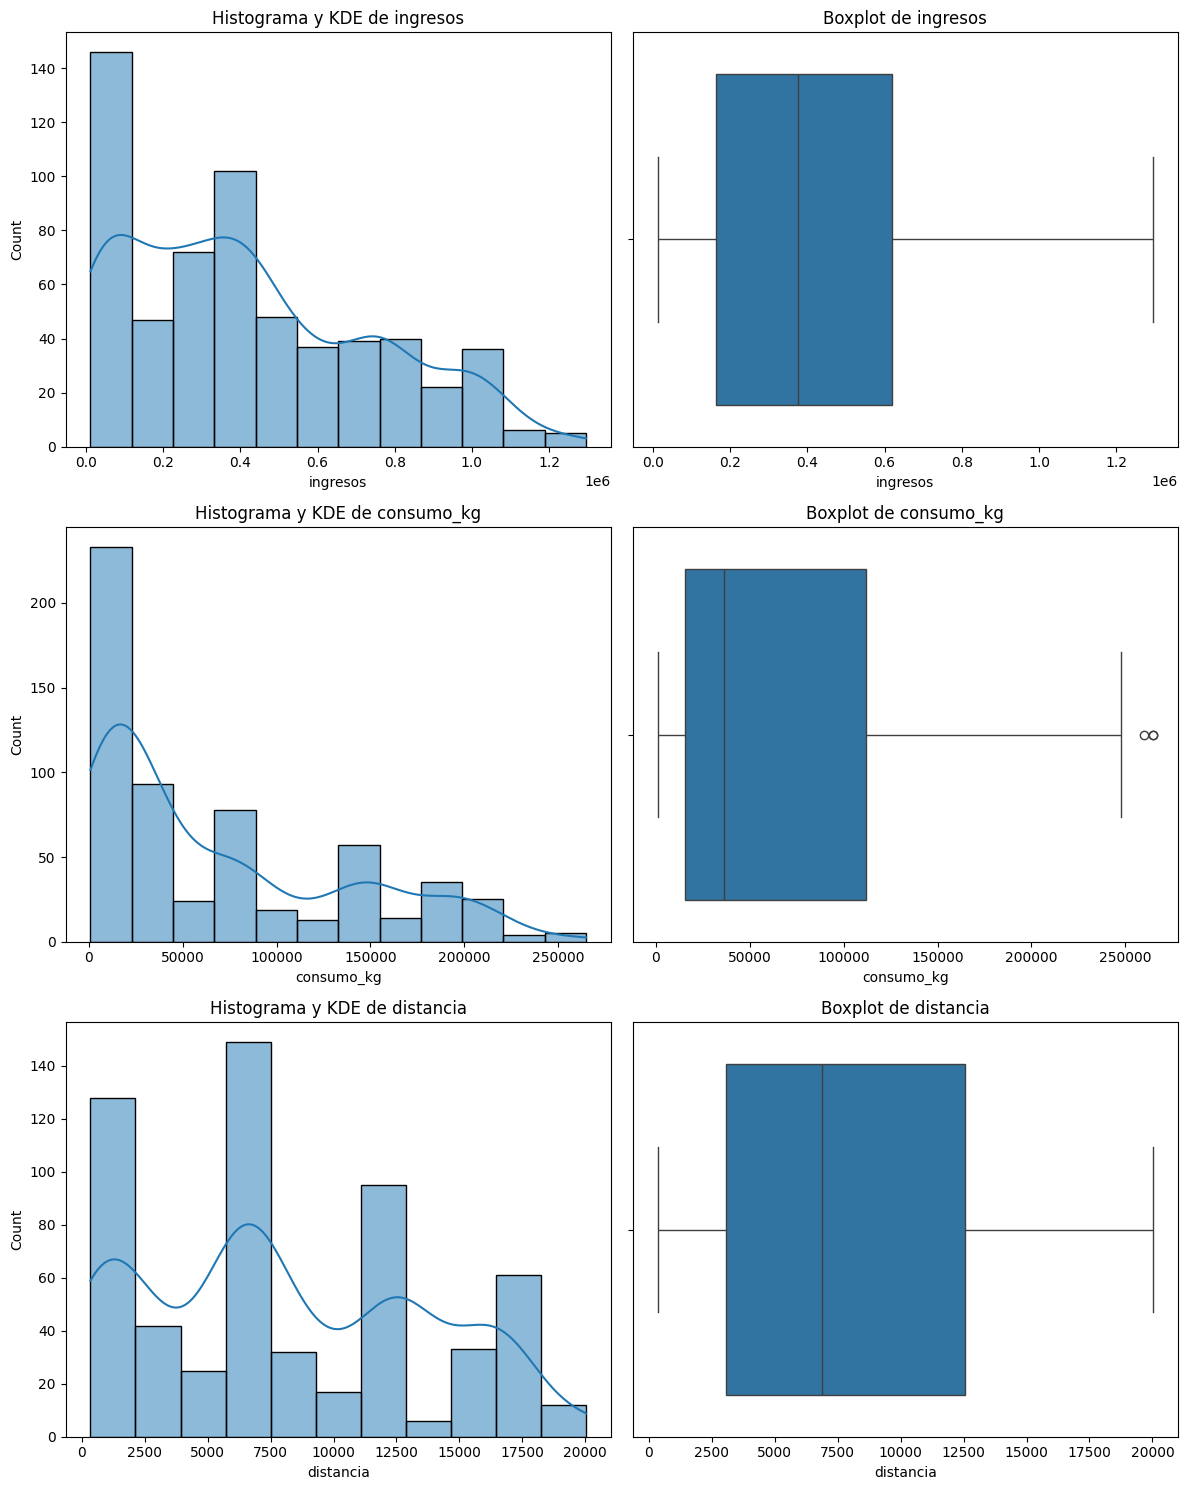

In [47]:
plot_combined_graphs(df_air_jun,["ingresos","consumo_kg","distancia"])

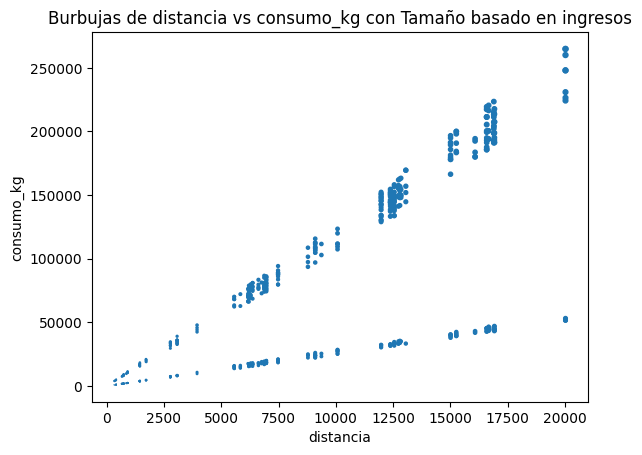

In [50]:
bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 100000)

In [51]:
# La linea inferior es la más eficiente en consumo, además los ingresos son similares por lo que lo optimo seria aproximarse a la linea inferior en la que teniendo ingresos similares a las otras es mucho mas eficiente.

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [53]:
df_air_jun['distancia'].describe()

count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64

In [54]:
bins = np.percentile(df_air_jun['distancia'], [0, 25, 50, 75,100])
df_air_jun['cat_vuelo'] = pd.cut(df_air_jun['distancia'], bins=bins, labels=['Corta', 'Media', 'Larga', 'Intercontinental'], include_lowest=True)
df_air_jun

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,Corta
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,Intercontinental
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,Larga
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,Media
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,Larga
...,...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23,Larga
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23,Corta
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23,Larga
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23,Intercontinental


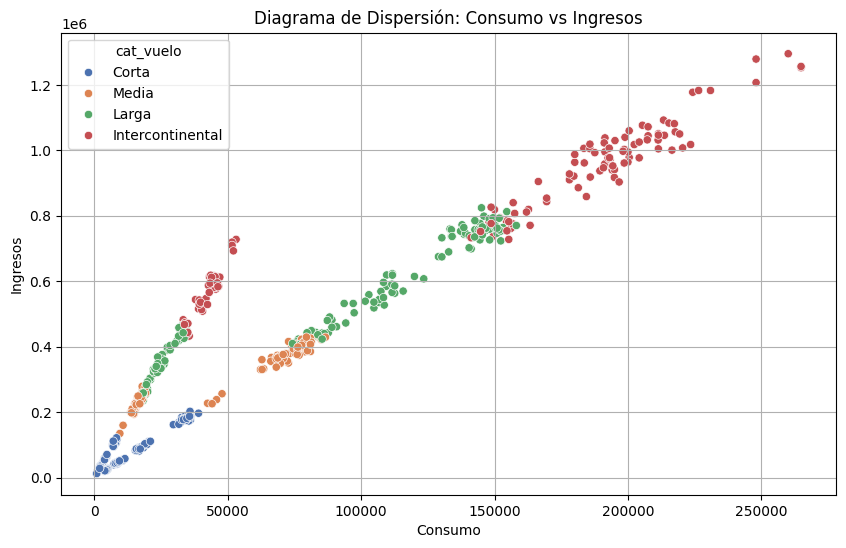

In [61]:
# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Crear el diagrama de dispersión
sns.scatterplot(x='consumo_kg', y='ingresos', data=df_air_jun, hue='cat_vuelo', palette='deep', legend=True)

# Añadir etiquetas y título
plt.xlabel('Consumo')
plt.ylabel('Ingresos')
plt.title('Diagrama de Dispersión: Consumo vs Ingresos')

# Mostrar el gráfico
plt.grid(True)
plt.show()


In [62]:
# Observamos que existe una rama donde los vuelos de media y larga distancia salen mas rentables ya que consumen menos pero sus ingresos no se dispersan en exceso

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.